In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

In [7]:
datasets = os.walk('./test_results').__next__()[1]

df = pd.DataFrame(columns=['dataset', 'exp_type', 'num_labeled', 'test_loss', 'test_acc', 'test_ece'])
for dataset in datasets:
    exp_types = os.walk('./test_results/' + dataset).__next__()[1]
    for exp_type in exp_types:
        metrics = pd.read_csv(f'./test_results/{dataset}/{exp_type}/test_metrics.csv')
        for num_labeled in metrics['num_labeled']:
            test_loss = metrics[metrics['num_labeled'] == num_labeled]['test_loss'].values[0]
            test_acc = metrics[metrics['num_labeled'] == num_labeled]['test_acc'].values[0]
            test_ece = metrics[metrics['num_labeled'] == num_labeled]['test_ece'].values[0]

            df.loc[len(df)] = {'dataset': dataset, 'exp_type': exp_type, 'num_labeled': num_labeled, 'test_loss': test_loss, 'test_acc': test_acc, 'test_ece': test_ece}

In [8]:
df

,dataset,exp_type,num_labeled,test_loss,test_acc,test_ece
0,bloodmnist,active-softmax,250,0.595640,0.878983,0.079704
1,bloodmnist,active-softmax,500,0.324889,0.931014,0.047572
2,bloodmnist,active-softmax,750,0.221566,0.947676,0.033199
3,bloodmnist,active-softmax,1000,0.203746,0.954692,0.029743
4,bloodmnist,active-softmax,1250,0.163833,0.963169,0.023387
...,...,...,...,...,...,...
166,cifar10,active-softmax,32500,0.328825,0.905500,0.040066
167,cifar10,active-softmax,35000,0.325250,0.905800,0.041068
168,cifar10,active-softmax,37500,0.320790,0.906700,0.040825
169,cifar10,active-softmax,40000,0.291889,0.913300,0.031017


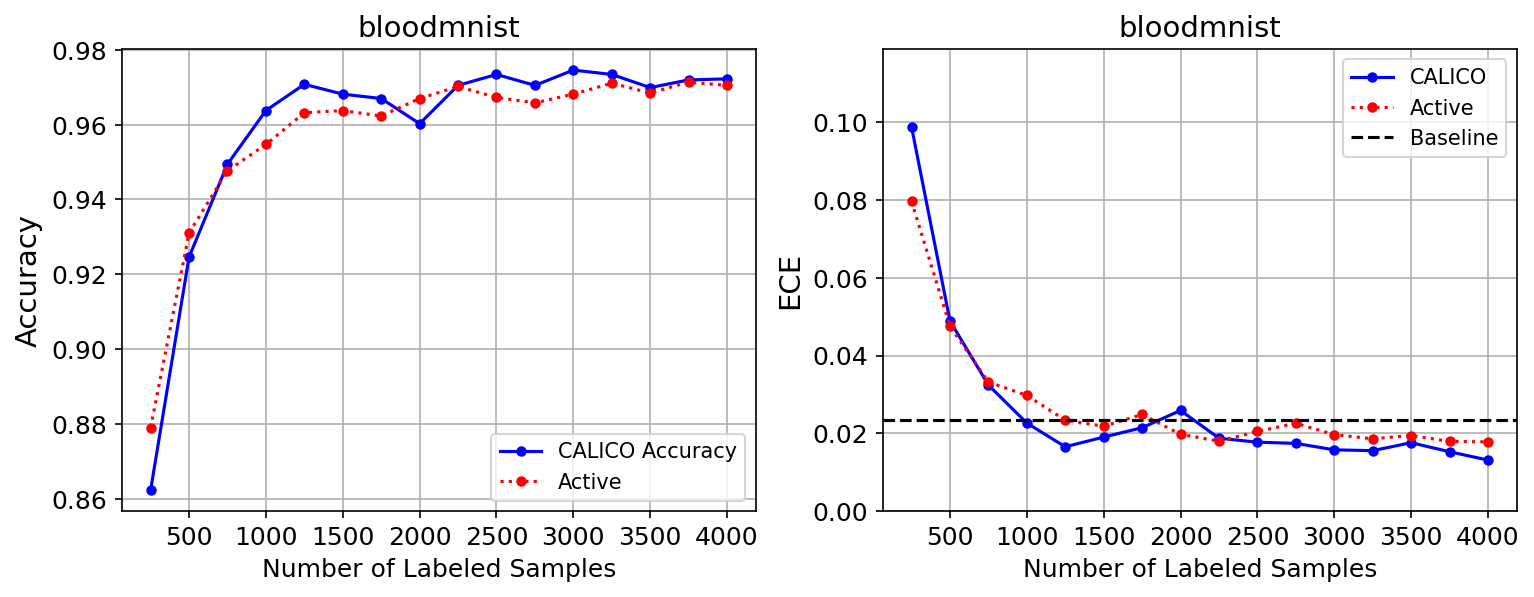

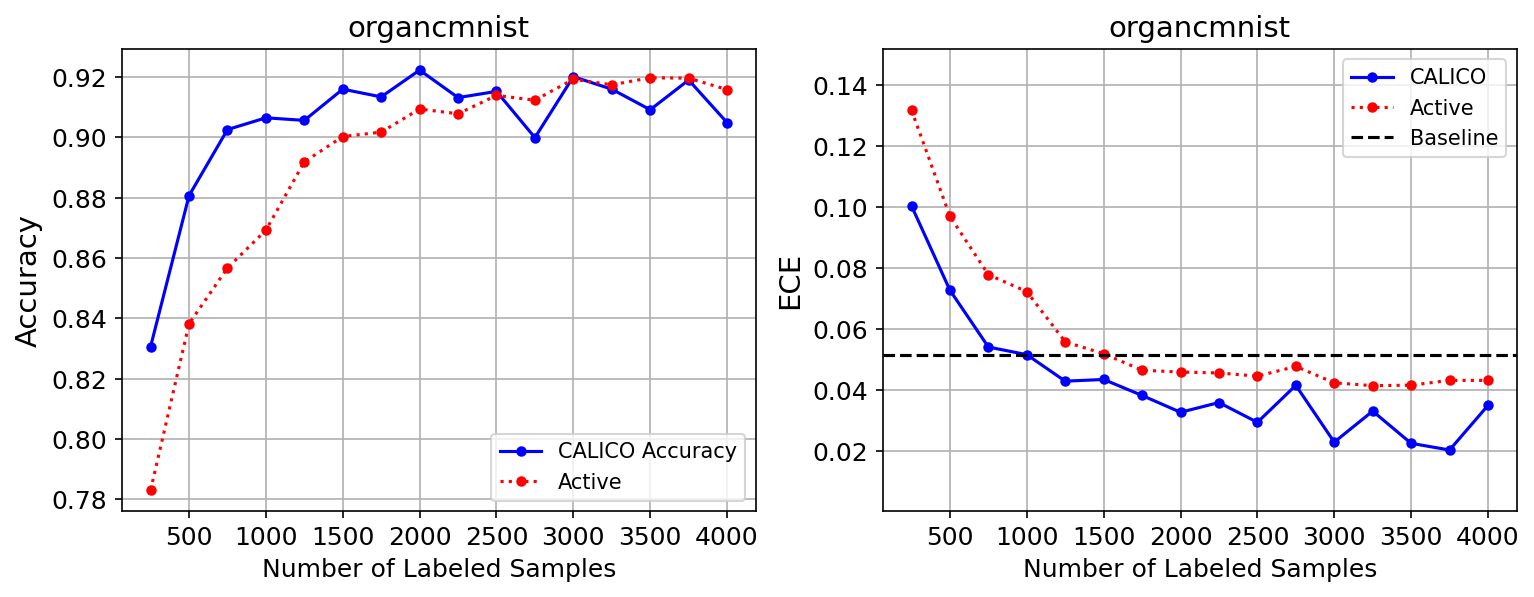

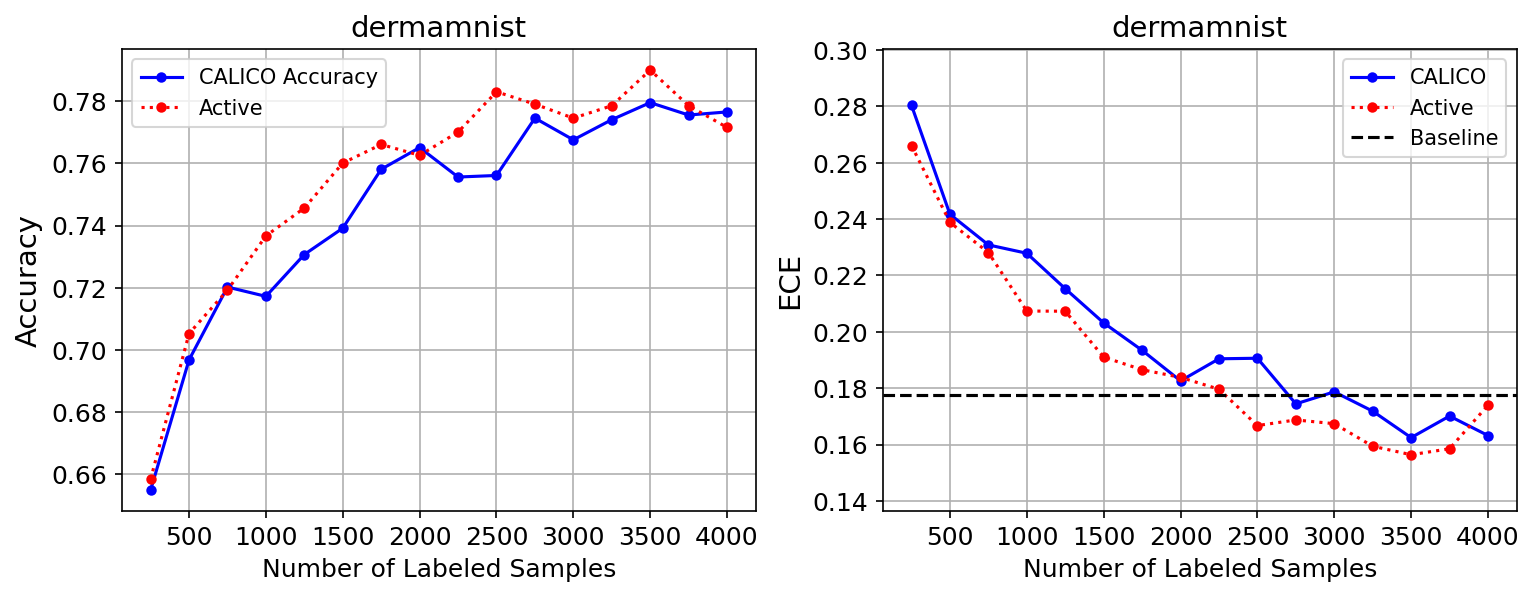

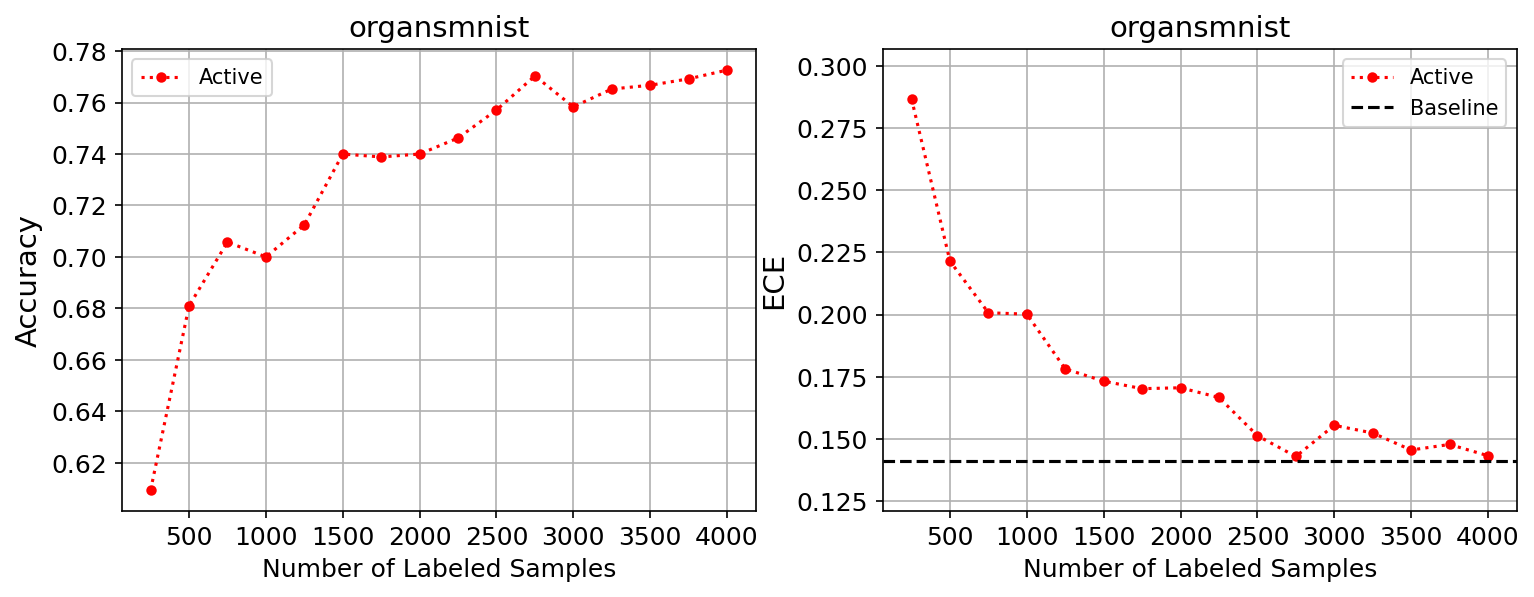

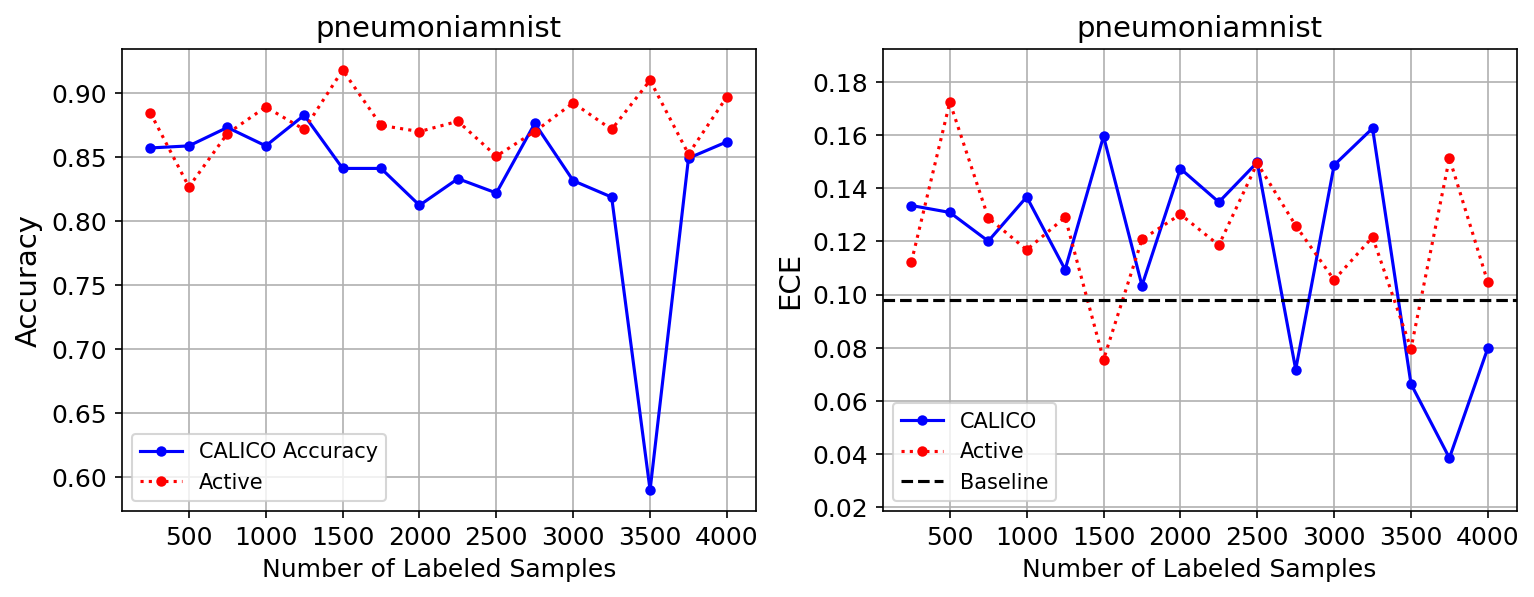

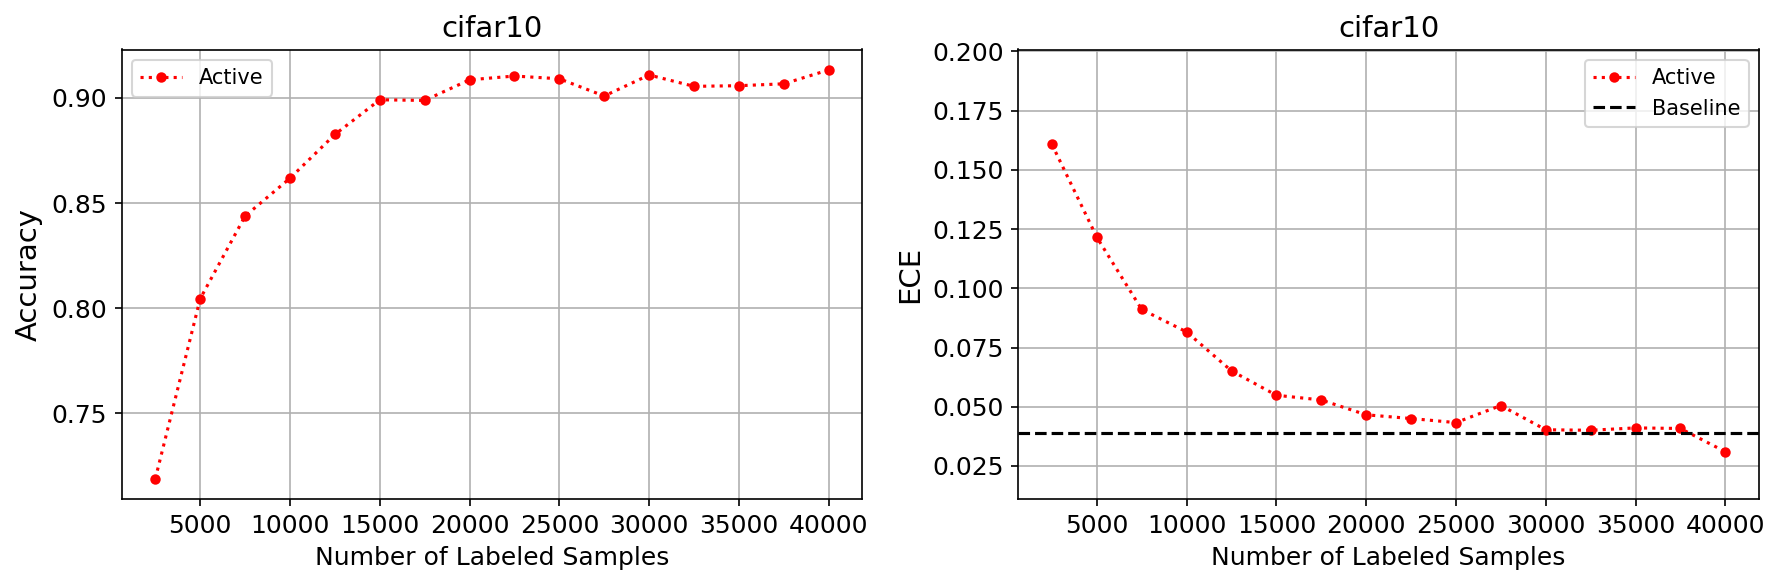

In [54]:
# Define the datasets and optimization methods
datasets = df['dataset'].unique()


# Iterate over the datasets
for i, dataset in enumerate(datasets):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=150)
    # Filter the data for the current dataset
    df_filtered = df[df['dataset'] == dataset]

    # plot the ece over num_labeled
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

    ax1.yaxis.set_major_formatter(FuncFormatter('{:.2f}'.format))

    # Plot the accuracy on the first axes
    if "active-jempp" in df_filtered['exp_type'].unique():
        df_experiment_active_jempp = df_filtered[df_filtered['exp_type'] == "active-jempp"]
        ax1.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_acc'],  # replace with the correct column name for accuracy
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )

    if "active-softmax" in df_filtered['exp_type'].unique():
        df_experiment_active_jempp = df_filtered[df_filtered['exp_type'] == "active-softmax"]
        ax1.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_acc'],  # replace with the correct column name for accuracy
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )

    ax1.set_ylabel("Accuracy", fontsize=14)

    # check if df_filtered as active_jempp
    if "active-jempp" in df_filtered['exp_type'].unique():
        # Plot the ECE mean for the active calibrated and uncalibrated methods
        df_experiment_active_jempp = df_filtered[df_filtered['exp_type'] == "active-jempp"]

        ax2.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_ece'],
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )

    if "active-softmax" in df_filtered['exp_type'].unique():
        df_active_softmax = df_filtered[df_filtered['exp_type'] == "active-softmax"]
        ax2.plot(
            df_active_softmax['num_labeled'],
            df_active_softmax['test_ece'],
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )

    if "baseline-softmax" in df_filtered['exp_type'].unique():
        df_baseline = df_filtered[df_filtered['exp_type'] == "baseline-softmax"]
        ax2.axhline(
            df_baseline['test_ece'].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline",
        )

    # Set min and max y limits (0.2 above and below the min and max values), if min goes below 0, set to 0
    min_y = df_filtered["test_ece"].min() - 0.02
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_ece"].max() + 0.02
    ax2.set_ylim([min_y, max_y])

    # Set the title, labels, and legend
    ax2.set_title(f"{dataset}", fontsize=14)
    ax2.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax2.set_ylabel("ECE", fontsize=14)
    ax2.tick_params(axis="both", which="major", labelsize=12)
    ax2.legend(loc="best")
    ax2.grid()
    
    ax1.set_title(f"{dataset}", fontsize=14)
    ax1.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax1.set_ylabel("Accuracy", fontsize=14)
    ax1.tick_params(axis="both", which="major", labelsize=12)
    ax1.legend(loc="best")
    ax1.grid()

plt.tight_layout()
plt.show()